In [19]:

import pandas as pd
from random import shuffle
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import csv
import warnings
from collections import Counter
import random
import time
%matplotlib inline

In [3]:
#Reading data 
#while running please change the path of the file 
nursery_data = pd.read_csv("F:/Semester 2/Machine Learning/Assignment/nursery.data",header = None,names = ["parents","has_nurs","form","children","housing","finance","social","health","class"])


In [4]:
#as all the columns are categorical, checking for unique values of each column
for i in nursery_data.columns:
    print(nursery_data[i].unique(),"\t",nursery_data[i].nunique())

['usual' 'pretentious' 'great_pret'] 	 3
['proper' 'less_proper' 'improper' 'critical' 'very_crit'] 	 5
['complete' 'completed' 'incomplete' 'foster'] 	 4
['1' '2' '3' 'more'] 	 4
['convenient' 'less_conv' 'critical'] 	 3
['convenient' 'inconv'] 	 2
['nonprob' 'slightly_prob' 'problematic'] 	 3
['recommended' 'priority' 'not_recom'] 	 3
['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior'] 	 5


# Online Bagging for nursery dataset

In [6]:

global train_data
global train_class
global test_data
global test_class
global models
global kArr

def f1score(y_true,y_pred):
    f1=f1_score(y_true, y_pred, average= 'micro')
    return f1
def precision(y_true,y_pred):
    pre=precision_score(y_true, y_pred, average='micro')
    return pre
def recall(y_true,y_pred):
    recall=recall_score(y_true, y_pred, average='micro')
    return recall
def accuracy(y_true,y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

def LoadData1(path):
    global train_data
    global train_class
    global test_data
    global test_class
    data = []
    with open(path) as csvfile:
        data1 = csv.reader(csvfile, delimiter=',', quotechar='|')
        for each in data1:
            X = []
            for x in each:
                #print x
                if (x == "very_crit"):
                    x=4
                elif (x=="proper" or x == "incomplete" or x == "more"):
                    x=3
                elif (x == "usual" or x == "less_proper" or x == "foster" or x == "3" or x == "less_conv" or x == "slightly_prob" or x == "recommended"):
                    x=2
                elif (x == "pretentious" or x == "improper" or x == "completed" or x == "2" or x == "critical" or x == "inconv" or x == "problematic" or x == "priority"):
                    x=1
                elif (x == "great_pret" or x == "critical" or x == "complete" or x == "1" or x == "convenient" or x == "convenient" or x == "not_recom" or x == "nonprob"):
                    x=0  
                    
                X.append(x)
                Y = X
                
            if (Y[-1] == "very_recom"):
                for i in range(10):
                    data.append(Y)
            elif (Y[-1] == "spec_prior"):
                for i in range(15):
                    data.append(Y)
            elif (Y[-1] == "recommend"):
                for i in range(17):
                    data.append(Y)
            elif (Y[-1] == "priority"):
                for i in range(18):
                    data.append(Y)
            else:
                data.append(Y)
                   
    shuffle(data)
    size = int(len(data) * 0.7)
    train_data = data[0:size]
    test_data = data[size:len(data)]
    train_class = np.array(train_data)[:, len(train_data[0]) - 1]
    train_data = np.array(train_data)[:, range(0, len(train_data[0]) - 1)]
    test_class = np.array(test_data)[:, len(test_data[0]) - 1]
    test_data = np.array(test_data)[:, range(0, len(test_data[0]) - 1)]
    train_data = [[int(j) for j in i] for i in train_data]
    test_data = [[int(j) for j in i] for i in test_data]
    
def addModels():
    global models
    for i in range(0,1000):
        models.append(MultinomialNB())
        
def fit(data,classdata):
    global models
    global kArr
    global train_class
    for i in range(0, 100):
        k = np.random.poisson(1,1)[0]
        if (k>999):
            k = 999
        kArr[k]+=1
        for j in range(0,k):
            models[i].partial_fit(data, classdata, classes =["recommend", "priority", "not_recom", "very_recom", "spec_prior"])


def predict(test_data):
    prediction = []
    for i in range(0, 100):
        prediction.append(models[i].predict(test_data))
    prediction = np.array(prediction).transpose()
    Final = []
    for each in prediction:
        Final.append(Counter(each).most_common(1)[0][0])
    #print (test_class, Final)
    print ("Precision is ", precision(test_class, np.array(Final)))
    print ("Recall is ", recall(test_class, np.array(Final)))
    print ("F1 score is ", f1score(test_class, np.array(Final)))
    print ("Accuracy is ", accuracy(test_class, np.array(Final)))
    
def main():
    global models
    global  kArr
    models = []
    kArr = [0]*100
    #while running please change the path of the file 
    LoadData1("F:/Semester 2/Machine Learning/Assignment/nursery.DATA")
    addModels()
    
    start = 0
    end = len(train_data)
    offset = 100
    count = 0
    start_time = time.time()
    while(start < end):
        if (count%100 == 0):
            print (count)
        count += 1
        
        data = train_data[start:start + offset]
        classdata = train_class[start:start + offset]
        start += offset
        fit(data,classdata)
    predict(test_data)
    print(time.time()-start_time)
    #print('kArr',kArr)

if __name__ == "__main__":main()


0
100
200
300
400
500
Precision is  0.8354081492029951
Recall is  0.8354081492029951
F1 score is  0.8354081492029951
Accuracy is  0.8354081492029951
68.85277605056763


# Implementing batch algorithms for nursery dataset

In [8]:
#while running please change the path of the file 
nursery_data = pd.read_csv("F:/Semester 2/Machine Learning/Assignment/nursery.data", names=["parents","has_nurs","form","children","housing","finance","social","health","class"])
nursery_data.head(10)



,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


## Data preprocessing

In [9]:
nursery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
parents     12960 non-null object
has_nurs    12960 non-null object
form        12960 non-null object
children    12960 non-null object
housing     12960 non-null object
finance     12960 non-null object
social      12960 non-null object
health      12960 non-null object
class       12960 non-null object
dtypes: object(9)
memory usage: 911.3+ KB


In [10]:
#as all the columns are categorical, checking for unique values of each column
for i in nursery_data.columns:
    print(nursery_data[i].unique(),"\t",nursery_data[i].nunique())

['usual' 'pretentious' 'great_pret'] 	 3
['proper' 'less_proper' 'improper' 'critical' 'very_crit'] 	 5
['complete' 'completed' 'incomplete' 'foster'] 	 4
['1' '2' '3' 'more'] 	 4
['convenient' 'less_conv' 'critical'] 	 3
['convenient' 'inconv'] 	 2
['nonprob' 'slightly_prob' 'problematic'] 	 3
['recommended' 'priority' 'not_recom'] 	 3
['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior'] 	 5


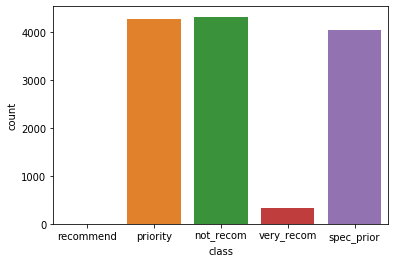

In [11]:
sns.countplot(nursery_data['class'])

The above graph shows how many instances of data have been spreaded into different categories. Though the dataset may be biased towards priority, not recommended and specific priority, we can proceed with this dataset.

## Data Encoding

In [12]:

#Categorical
features = ["children","housing","class","has_nurs","social","finance"]
for column in features:
    nursery_data[column] = nursery_data[column].astype("category").cat.codes


features1 = ['parents','form','health']
x1 = nursery_data.drop(features1, axis = 1)

# Geting Dummies as target is categorical and has more than 2 values.
x2 = nursery_data.drop(features, axis = 1)
x2 = pd.get_dummies(x2)

#Concatinating into a dataframe
x = pd.concat([x1, x2], axis = 1)

#separating target attribute from the rest of the data
target = ["class"]
X = x.drop(target, axis = 1)
target = x[target]
Y = pd.DataFrame(target)
Y = np.array(Y)
Y = np.ravel(Y) #converting array to vector

X.shape    

(12960, 15)

## Modeling

In [13]:
#Applying principal component analysis, to reduce number of attributes
pca = PCA(n_components=8)
xtr = pca.fit_transform(X)

xtr.shape


(12960, 8)

In [20]:
#splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(xtr,Y, test_size=0.3)

#scaling train and test dataset
x_train.reshape(-1, 1) #reshapinng the data
y_train.reshape(-1, 1)
x_train = MinMaxScaler().fit_transform(x_train)

X is the dataframe containing input data / features y is the series which has results which are to be predicted

In [22]:
#Decision Tree
start_time = time.time()
classifiers = {}
clf = tree.DecisionTreeClassifier()
clf.set_params(max_leaf_nodes = 1000,max_depth = 5)
dt_clf = clf.fit(x_train,y_train)
dt_predict = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test,dt_predict)
param =  dt_clf.get_params()
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())#,f_score.mean())#, "-", recall.mean(), "-", precision_score.mean())
print ("F1 score is",  f_score.mean())
classifiers["DT"]=clf 
t0 =  time.time()-start_time
print("Time taken for decision tree",t0)


C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy is 0.8820469518119298
F1 score is 0.8820469518119296
Time taken for decision tree 0.35764026641845703


In [18]:
#Support Vector Machines
start_time = time.time()
clf = svm.SVC(gamma = 'auto')
clf.set_params(C = 1000, kernel = "rbf")
svm_clf = clf.fit(x_train,y_train)
svm_predict = svm_clf.predict(x_test)
svm_acc = accuracy_score(y_test,svm_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["SVM"]=clf
t1 =  time.time()-start_time
print("Time taken for SVM",t1)


C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy is 0.9377231115607275
F1 score is 0.9377231115607275
Time taken for SVM 87.48754644393921


In [23]:
#Bagging
start_time = time.time()
clf = BaggingClassifier()
clf.set_params(n_estimators = 30,max_samples = 1000)
bg_clf = clf.fit(x_train,y_train)
bg_predict = bg_clf.predict(x_test)
bg_acc = accuracy_score(y_test,bg_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["BG"]=clf
t2 =  time.time()-start_time
print("Time taken for Bagging",t2)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy is 0.9303341958835329
F1 score is 0.9291233482007168
Time taken for Bagging 3.7329041957855225


In [24]:
#Random Forest Classifier
start_time = time.time()
clf = RandomForestClassifier()
clf.set_params(n_estimators = 100, max_depth = 10)
rf_clf = clf.fit(x_train,y_train)
rf_predict = rf_clf.predict(x_test)
rf_acc = accuracy_score(y_test,rf_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["RF"]=clf
t3 =  time.time()-start_time
print("Time taken for Random forest",t3)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy is 0.9237234658596281
F1 score is 0.9235032004737995
Time taken for Random forest 15.050720691680908


In [25]:
#AdaBoost
start_time = time.time()
clf = AdaBoostClassifier()
clf.set_params(n_estimators = 100, learning_rate = 1)
ada_clf = clf.fit(x_train,y_train)
ada_predict = ada_clf.predict(x_test)
ada_acc = accuracy_score(y_test,ada_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["ADA"]=clf
t4 =  time.time()-start_time
print("Time taken for Adaboost",t4)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy is 0.7445007265795097
F1 score is 0.7445007265795096
Time taken for Adaboost 14.837157011032104


In [26]:
#Perceptron
start_time = time.time()
clf = linear_model.Perceptron()
clf.set_params(alpha = 0.0001)
pt_clf = clf.fit(x_train,y_train)
pt_predict = pt_clf.predict(x_test)
pt_acc = accuracy_score(y_test,pt_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["PT"]=clf
t5 =  time.time()-start_time
print("Time taken for Perceptron",t5)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy is 0.7237472235312263
F1 score is 0.7237472235312263
Time taken for Perceptron 1.3353571891784668


In [27]:
#Multinomial Naive Bayes
start_time = time.time()
x_train.reshape(-1, 1)
y_train.reshape(-1, 1)
clf = MultinomialNB()
clf.set_params(alpha = 0.1)
nb_clf = clf.fit(x_train,y_train)
nb_predict = nb_clf.predict(x_test)
nb_acc = accuracy_score(y_test,nb_predict)
accuracy = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, x_train , y_train, cv=10,scoring = 'f1_micro')
print ("Accuracy is",  accuracy.mean())
print ("F1 score is",  f_score.mean())
classifiers["NB"]=clf
t6 =  time.time()-start_time
print("Time taken for Naive bayes",t6)


Accuracy is 0.7679603221011193
F1 score is 0.7679603221011193
Time taken for Naive bayes 0.17846274375915527


C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [28]:
t = [t0,t1,t2,t3,t4,t5,t6]
b = enumerate(t)
for i in b:
    print(i) #shows time taken for classifiers in seconds 
    #0 - Decision tree
    #1 - SVM
    #2 - Bagging
    #3 - Random forest
    #4 - AdaBoost
    #5 - Perceptron
    #6 - Naive Bayes

(0, 0.35764026641845703)
(1, 87.48754644393921)
(2, 3.7329041957855225)
(3, 15.050720691680908)
(4, 14.837157011032104)
(5, 1.3353571891784668)
(6, 0.17846274375915527)
